In [7]:
# Importing the Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Read the Data
ch_plant_data = pd.read_csv("./plant-data.csv")

ch_plant_data['Time'] = pd.to_datetime(ch_plant_data['Time'])

ch_plant_data['Month'] = ch_plant_data['Time'].dt.month
ch_plant_data['Day'] = ch_plant_data['Time'].dt.day
ch_plant_data['Hour'] = ch_plant_data['Time'].dt.hour

In [9]:
# Explore the Data
print(ch_plant_data.head())

print(ch_plant_data['Month'].value_counts())

                 Time     RT  kW_Tot  kW_RT  CH Load  CH1  CH2  CH3  CH4  \
0 2023-12-01 00:00:00  201.2   208.7  1.037     39.6    0    1    0    0   
1 2023-12-01 00:10:00  180.5   203.5  1.127     38.4    0    1    0    0   
2 2023-12-01 00:20:00  170.2   200.8  1.179     37.6    0    1    0    0   
3 2023-12-01 00:30:00  184.9   201.2  1.088     37.8    0    1    0    0   
4 2023-12-01 00:40:00  176.4   181.4  1.028     34.6    0    1    0    0   

   kW_CHH  ...  Hz_CHS  Hz_CDS  Hz_CT  Precent_CH  Precent_ CHP  Precent_CDS  \
0   135.6  ...       0      47   47.0        65.0          11.2         14.8   
1   130.4  ...       0      47   47.0        64.1          11.5         15.2   
2   127.8  ...       0      47   47.0        63.6          11.6         15.4   
3   128.3  ...       0      47   47.0        63.8          11.6         15.2   
4   117.6  ...       0      47   47.0        64.8          13.3         17.0   

   Precent_CT  Month  Day  Hour  
0         9.1     12    1   

In [10]:
# Clean the Data
ch_plant_data = ch_plant_data[ch_plant_data['Month'].isin([3, 8, 12])]

In [11]:
print(ch_plant_data['Month'].value_counts())

Month
8     4454
12    4440
3     4435
Name: count, dtype: int64


In [12]:
# Read the Secondary Data
climate_data = pd.read_csv("./climate-data.csv")

climate_data['Month'] = pd.to_datetime(climate_data['DateTime']).dt.month
climate_data['Day'] = pd.to_datetime(climate_data['DateTime']).dt.day

In [13]:
# Explore the Secondary Data
print(climate_data.head())

print(climate_data['Month'].value_counts())

                  DateTime  RH [%]  Temperature [°C]  WBT_C  Month  Day
0  2024-03-01 00:00:42.000    68.4              30.8   26.1      3    1
1  2024-03-01 00:10:42.000    68.3              30.8   26.1      3    1
2  2024-03-01 00:20:42.000    68.3              30.8   26.0      3    1
3  2024-03-01 00:30:42.000    68.4              30.8   26.1      3    1
4  2024-03-01 00:40:42.000    68.6              30.7   26.0      3    1
Month
8     4489
3     4467
5     4461
12    4451
4     4319
Name: count, dtype: int64


In [14]:
# Group the Secondary Data
mean_humidity = climate_data.groupby(['Month', 'Day'])['RH [%]'].mean()
mean_temperature = climate_data.groupby(['Month', 'Day'])['Temperature [°C]'].mean()
mean_wbt = climate_data.groupby(['Month', 'Day'])['WBT_C'].mean()

In [15]:
# Merge the Secondary and Primary Data
ch_plant_data['Temperature'] = ch_plant_data.apply(lambda row: mean_temperature.get((row['Month'], row['Day'])), axis=1)
ch_plant_data['Humidity'] = ch_plant_data.apply(lambda row: mean_humidity.get((row['Month'], row['Day'])), axis=1)
ch_plant_data['WBT'] = ch_plant_data.apply(lambda row: mean_wbt.get((row['Month'], row['Day'])), axis=1)

In [16]:
print(ch_plant_data.corrwith(ch_plant_data['CH Load']))

Time            0.086704
RT              0.933888
kW_Tot          0.995522
kW_RT           0.024881
CH Load         1.000000
CH1             0.360223
CH2            -0.020552
CH3                  NaN
CH4                  NaN
kW_CHH          0.999987
kW_CHP          0.553079
kW_CHS               NaN
kW_CDS          0.522046
kW_CT           0.519666
GPM             0.602003
DeltaCHW        0.875513
CHWS           -0.150490
CHWR            0.624660
DeltaCDW        0.893797
CDHI            0.860577
CDLO            0.782818
WBT             0.373330
DeltaCT        -0.600944
Hz_ CHP         0.420432
Hz_CHS               NaN
Hz_CDS          0.397683
Hz_CT           0.533061
Precent_CH      0.785101
Precent_ CHP   -0.674231
Precent_CDS    -0.740531
Precent_CT     -0.722484
Month          -0.262829
Day            -0.056038
Hour            0.393893
Temperature     0.344731
Humidity        0.287819
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: >

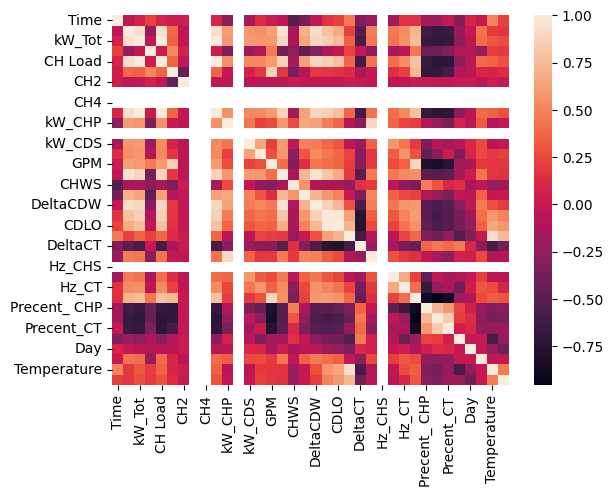

In [17]:
# calculate co-relation of 'CH Load' with other variables
sns.heatmap(ch_plant_data.corr())

In [18]:
# Encoding the Dataset
ch_plant_data_encoded = pd.get_dummies(ch_plant_data, columns = ['Month', 'Hour'], drop_first = True, dtype = int)

In [19]:
# View the Prepared Dataset
print(ch_plant_data_encoded.head())
print(ch_plant_data_encoded.columns)

                 Time     RT  kW_Tot  kW_RT  CH Load  CH1  CH2  CH3  CH4  \
0 2023-12-01 00:00:00  201.2   208.7  1.037     39.6    0    1    0    0   
1 2023-12-01 00:10:00  180.5   203.5  1.127     38.4    0    1    0    0   
2 2023-12-01 00:20:00  170.2   200.8  1.179     37.6    0    1    0    0   
3 2023-12-01 00:30:00  184.9   201.2  1.088     37.8    0    1    0    0   
4 2023-12-01 00:40:00  176.4   181.4  1.028     34.6    0    1    0    0   

   kW_CHH  ...  Hour_14  Hour_15  Hour_16  Hour_17  Hour_18  Hour_19  Hour_20  \
0   135.6  ...        0        0        0        0        0        0        0   
1   130.4  ...        0        0        0        0        0        0        0   
2   127.8  ...        0        0        0        0        0        0        0   
3   128.3  ...        0        0        0        0        0        0        0   
4   117.6  ...        0        0        0        0        0        0        0   

   Hour_21  Hour_22  Hour_23  
0        0        0      

In [20]:
# Save Cleaned Final Dataset
feature_names = ['Temperature', 'Humidity', 'kW_Tot', 'kW_CHH', 'kW_CHP', 'kW_CDS', 'kW_CT', 'GPM', 'DeltaCHW', 'DeltaCDW', 'Hz_CT', 'Precent_CT', 'Month_8', 'Month_12', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'CH Load']
ch_plant_data_encoded.to_csv('./ch_data.csv', columns = feature_names, index = False)

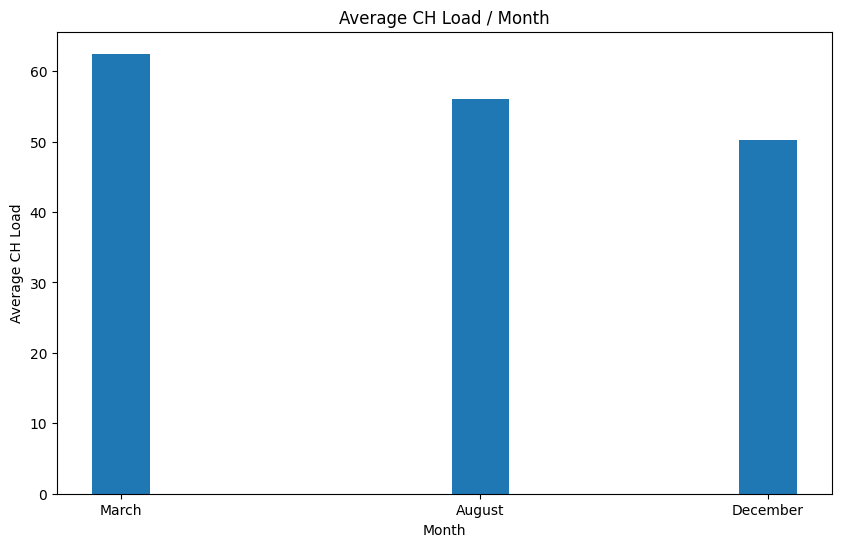

In [21]:
mean_ch_load = ch_plant_data.groupby('Month')['CH Load'].mean()

# Month-wise CH Load (Correlation)
plt.figure(figsize=(10, 6))
plt.bar(mean_ch_load.index, mean_ch_load.values)
plt.xlabel('Month')
plt.ylabel('Average CH Load')
plt.title('Average CH Load / Month')
plt.xticks(mean_ch_load.index, ['March', 'August', 'December'])
plt.show()

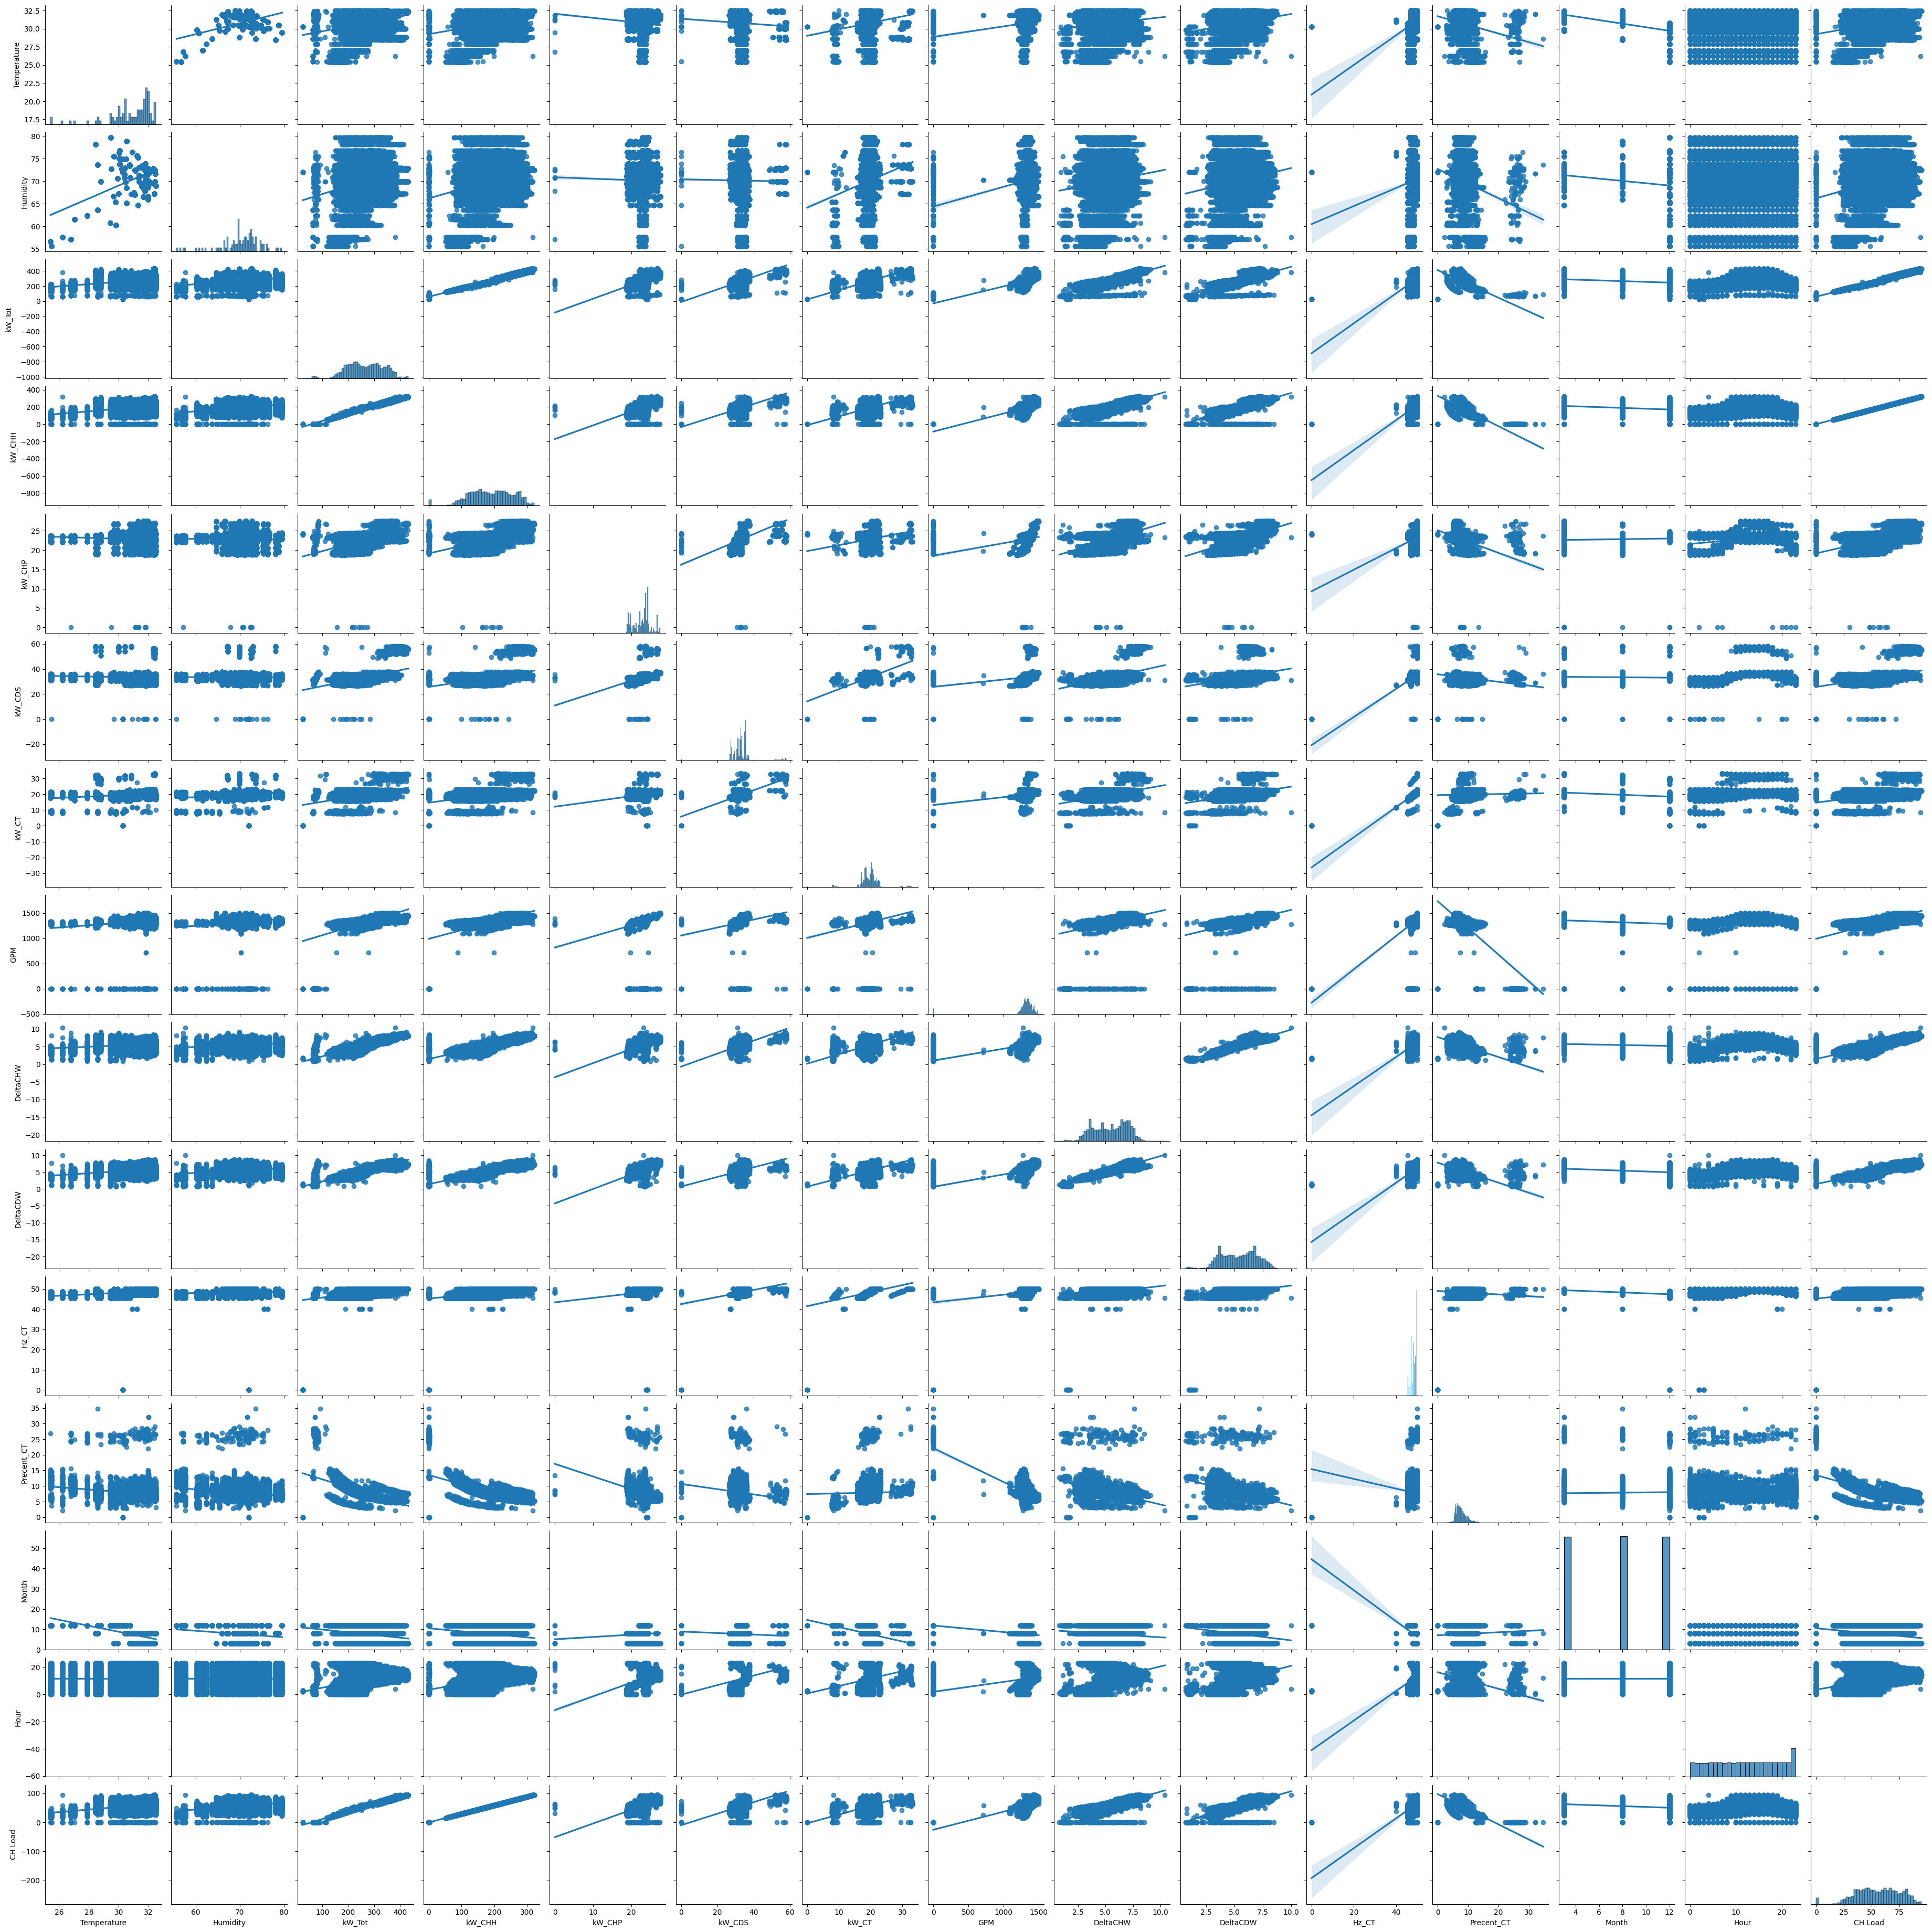

In [22]:
sns.pairplot(ch_plant_data, vars = ['Temperature', 'Humidity', 'kW_Tot', 'kW_CHH', 'kW_CHP', 'kW_CDS', 'kW_CT', 'GPM', 'DeltaCHW', 'DeltaCDW', 'Hz_CT', 'Precent_CT', 'Month', 'Hour', 'CH Load'], kind = 'reg')
plt.show()